In [1]:
# this notebook shows numerical scaling issues in DL

In [2]:
import numpy as np
import matplotlib.pyplot as plt


import torch
import torch.nn as nn

In [3]:
# create 2 normal-random matrices from Gaussian normal disbn
q = np.random.randn(50,50)
k = np.random.randn(50,50)

# all pairwise dot products via mat mult
dp = q @ k.T


In [4]:
# check mean and std dev
std_q = np.std(q)
std_k = np.std(k)
std_dp = np.std(dp)

print(f'Std dev of q: {std_q:.4f}')
print(f'Std dev of k: {std_k:.4f}')
print(f'Std dev of dp: {std_dp:.4f}')
print(f'Square root of dimension {np.sqrt(q.shape[1]):.4f}')

# asp expected std of q and k is aroudn 1 as it is normal disbm
# std of Q.Kt is 7 which is close to  sqrt of dimension


Std dev of q: 1.0168
Std dev of k: 0.9999
Std dev of dp: 7.0371
Square root of dimension 7.0711


In [10]:
vector_lengths = np.arange(2,100)
dp_stds = np.zeros(len(vector_lengths))

for l in range(len(vector_lengths)):

    q = np.random.randn(50, vector_lengths[l])
    k = np.random.randn(50, vector_lengths[l])

    dps = q@k.T

    dp_stds[l] = np.std(dps)

    

In [12]:
vector_lengths

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [11]:
dp_stds

array([ 1.60094391,  1.98312055,  1.87483658,  2.31089713,  2.47068531,
        2.59766115,  3.11571479,  2.92965127,  3.19267989,  3.40103181,
        3.7011915 ,  3.84645611,  3.72471995,  3.68736376,  4.1002185 ,
        4.23138422,  4.34753533,  4.42403191,  4.47862433,  4.62880522,
        4.54917449,  4.59114616,  4.75381557,  4.82510423,  5.06443156,
        5.44159347,  5.72280638,  5.51452914,  5.47914456,  5.18384363,
        5.78245544,  5.98271052,  5.58118607,  5.78963561,  6.1193955 ,
        6.3108949 ,  6.1530939 ,  6.44367526,  6.40826187,  6.45028973,
        6.48109699,  6.31897601,  6.7501509 ,  6.7823214 ,  6.5666135 ,
        6.6125309 ,  6.80430011,  7.16328314,  6.86457047,  7.28286494,
        7.3649646 ,  7.44156431,  7.31778364,  7.70818638,  7.17502899,
        7.63096505,  7.66373504,  7.73478077,  7.59337623,  7.92468655,
        7.82287811,  7.91044806,  8.02648898,  8.38407351,  8.15071695,
        8.00326545,  8.17368933,  8.29903357,  8.35285838,  8.67

In [14]:
np.sqrt(99)

9.9498743710662

# Check GPT2 layernorm params

In [16]:
from transformers import AutoModelForCausalLM, GPT2Tokenizer
gpt2 = AutoModelForCausalLM.from_pretrained('gpt2')

/Users/raeez/.pyenv/versions/jupyter-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
# gather all layernorm paranms
all_ln_weights = np.array([])
all_ln_biases= np.array([])

for name, mat in gpt2.named_parameters():
    if 'ln' in name: # check for layernorm params
        if 'weight' in name:
            all_ln_weights =  np.append(all_ln_weights, mat.data)
        elif 'bias' in name:
            all_ln_biases = np.append(all_ln_biases, mat.data)

/var/folders/kp/vjs9jtxn58jc4yz25r1fmfqw0000gn/T/ipykernel_44452/1234121430.py:6: RuntimeWarning: divide by zero encountered in log
  axs[0].plot(xW[:-1], np.log(yW), 'ks-', markerfacecolor=[.9,.7,.7])
/var/folders/kp/vjs9jtxn58jc4yz25r1fmfqw0000gn/T/ipykernel_44452/1234121430.py:9: RuntimeWarning: divide by zero encountered in log
  axs[1].plot(xB[:-1], np.log(yB), 'ko-', markerfacecolor=[.7,.7,.9])


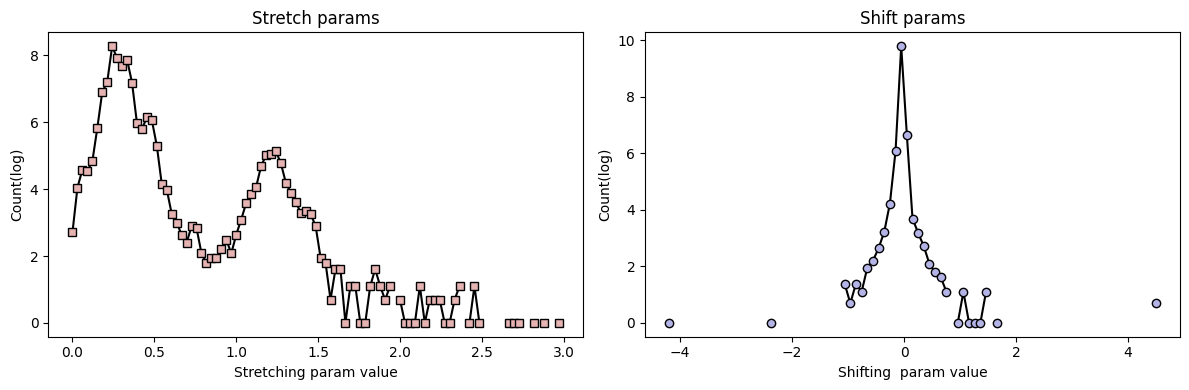

In [18]:
# claculate their disbns
yW, xW = np.histogram(all_ln_weights, bins = np.linspace(0,3,100))
yB, xB = np.histogram(all_ln_biases, bins = np.linspace(-5,5,100))

_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(xW[:-1], np.log(yW), 'ks-', markerfacecolor=[.9,.7,.7])
axs[0].set(xlabel='Stretching param value', ylabel='Count(log)',title='Stretch params')

axs[1].plot(xB[:-1], np.log(yB), 'ko-', markerfacecolor=[.7,.7,.9])
axs[1].set(xlabel='Shifting  param value', ylabel='Count(log)',title='Shift params')


plt.tight_layout()
plt.show()



The above plots show that in GPT:
   - stretching params are mostly small b/w 0 and 0.5
   - most of the stretching is b/w 0.2,0.3
       - this means we mainly shrink activation values by a third or a fifth
   - Shifting params are tightly distributed (around 0)